Nombre de containers utilisés: 3
Container 1 : [5, 5, 5, 4, 1] Volume total utilisé: 20
Container 2 : [4, 3, 3, 3, 3, 2, 2] Volume total utilisé: 20
Container 3 : [2, 1, 1, 1, 1, 1] Volume total utilisé: 7


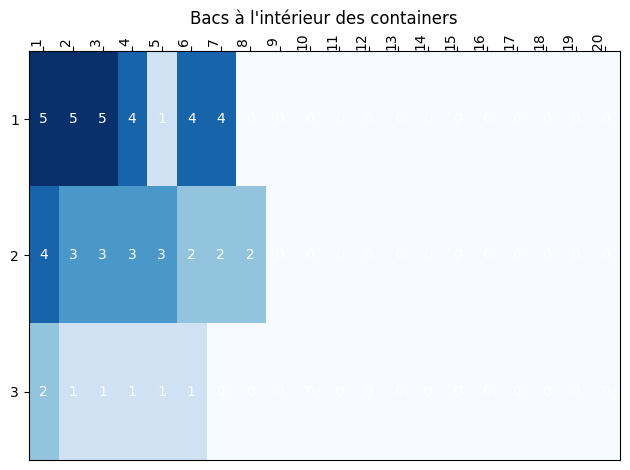

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ffd_algorithm(bin_sizes, bin_counts, capacity):
    # Créer une liste vide pour contenir les containers
    containers = [[]]
    # Créer une liste vide pour stocker le volume total utilisé dans chaque container
    total_volume = [0]
    # Trier les tailles des bacs de la plus grande à la plus petite
    sorted_sizes = sorted(bin_sizes, reverse=True)
    # Parcourir chaque taille de bac et quantité, et essayer de placer les bacs dans les containers
    for bin_size, bin_count in zip(sorted_sizes, bin_counts):
        for i in range(bin_count):
            # Trouver le premier container ayant suffisamment d'espace pour contenir le bac
            for j, container in enumerate(containers):
                if total_volume[j] + bin_size <= capacity:
                    container.append(bin_size)
                    total_volume[j] += bin_size
                    break
            else:
                # Si aucun container n'a suffisamment d'espace, créer un nouveau container
                containers.append([bin_size])
                total_volume.append(bin_size)
    # Afficher le nombre de containers utilisés et le volume total utilisé dans chaque container
    print("Nombre de containers utilisés:", len(containers))
    for i, container in enumerate(containers):
        print("Container", i+1, ":", container, "Volume total utilisé:", total_volume[i])

    # Créer une représentation matricielle des containers et des bacs
    matrix = np.zeros((len(containers), capacity))
    for i, container in enumerate(containers):
        for j, bin_size in enumerate(container):
            matrix[i, j:j+bin_size] = bin_size
    
    # Afficher la matrice sous forme de heatmap
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, cmap='Blues', aspect='auto')
    ax.set_xticks(np.arange(capacity))
    ax.set_yticks(np.arange(len(containers)))
    ax.set_xticklabels(np.arange(capacity)+1)
    ax.set_yticklabels(np.arange(len(containers))+1)
    
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="center", rotation_mode="anchor")
    for i in range(len(containers)):
        for j in range(capacity):
            text = ax.text(j, i, int(matrix[i, j]), ha="center", va="center", color="w")
    ax.set_title("Bacs à l'intérieur des containers")
    fig.tight_layout()
    plt.show()


# Lire les tailles des bins
tailles_bins = []
while True:
    taille = input("Entrez la taille d'un bin (ou 'terminé' pour finir) : ")
    if taille == "terminé":
        break
    tailles_bins.append(int(taille))
# Lire le nombre de bins
nombres_bins = []
for taille_bin in tailles_bins:
    nombre = int(input("Entrez le nombre de bacs de taille {}: ".format(taille_bin)))
    nombres_bins.append(nombre)
# Lire la taille des conteneurs
capacite_conteneur = int(input("Entrez la taille des conteneurs : "))

ffd_algorithm(tailles_bins, nombres_bins, capacite_conteneur)